In [1]:
import pickle
import cv2
import time
import numpy as np
import tensorflow as tf
import os.path
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__

'2.9.1'

# Creating DataFrames

In [3]:
image_dir = Path(r'')

In [4]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name = 'Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')

image_df = pd.concat([filepaths, labels], axis = 1)
image_df

In [ ]:
image_dir = Path(r'')
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name = 'Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')

test_df1 = pd.concat([filepaths, labels], axis = 1)
test_df1

In [7]:
train_df, test_df = train_test_split(image_df, train_size = 0.92, shuffle = True, random_state = 42)

# Loading Data

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    validation_split = 0.15
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [19]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 64,
    shuffle = True,
    seed = 1,
    subset = 'training',
)

val_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 64,
    shuffle = True,
    seed = 1,
    subset = 'validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'Filepath',
    y_col = 'Label',
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 1,
    shuffle = False
)

test_images_mal = test_generator.flow_from_dataframe(
    dataframe = test_df1,
    x_col = 'Filepath',
    y_col = 'Label',
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 1,
    shuffle = False
)

Found 13505 validated image filenames belonging to 2 classes.
Found 2383 validated image filenames belonging to 2 classes.
Found 1382 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


# Training

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same')) #, kernel_initializer='he_uniform', strides = (2, 2)

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation = 'relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation = 'relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(1024, (3, 3), activation = 'relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_images, epochs = 44, validation_data = val_images, callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True), tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])

Epoch 1/44
212/212 [==============================] - 232s 1s/step - loss: 0.7381 - accuracy: 0.6481 - val_loss: 1.1225 - val_accuracy: 0.4969 - lr: 0.0010
Epoch 2/44
212/212 [==============================] - 231s 1s/step - loss: 0.5770 - accuracy: 0.7157 - val_loss: 0.5531 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 3/44
212/212 [==============================] - 224s 1s/step - loss: 0.4943 - accuracy: 0.7628 - val_loss: 0.4631 - val_accuracy: 0.7789 - lr: 0.0010
Epoch 4/44
212/212 [==============================] - 209s 984ms/step - loss: 0.4192 - accuracy: 0.8084 - val_loss: 0.4920 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 5/44
212/212 [==============================] - 207s 976ms/step - loss: 0.3815 - accuracy: 0.8330 - val_loss: 0.3922 - val_accuracy: 0.8246 - lr: 0.0010
Epoch 6/44
212/212 [==============================] - 216s 1s/step - loss: 0.3595 - accuracy: 0.8443 - val_loss: 0.4644 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 7/44
212/212 [==============================] - 213s

# Results

In [14]:
results = model.evaluate(test_images, verbose = 0)
print('Loss:', results[0])
print('Accuracy:', round(results[1] * 100, 3), '%')

Loss: 0.23971818387508392
Accuracy: 91.172 %


1382/1382 [==============================] - 6s 4ms/step


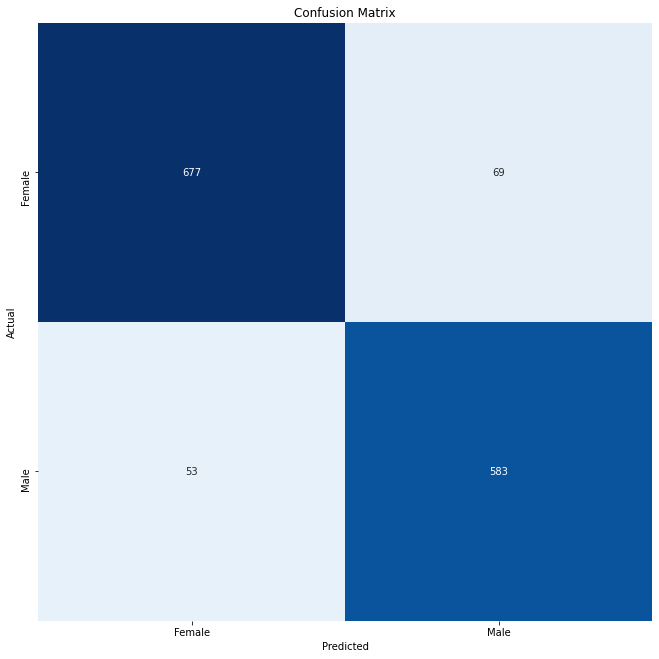

In [15]:
predictions = (model.predict(test_images) >= 0.5).astype(int)
cm = confusion_matrix(test_images.labels, predictions, labels = [0, 1])

plt.figure(figsize = (11, 11))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Female', 'Male'])
plt.yticks(ticks = [0.5, 1.5], labels = ['Female', 'Male'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [20]:
results = model.evaluate(test_images_mal, verbose = 0)
print('Loss:', results[0])
print('Accuracy:', round(results[1] * 100, 3), '%')

Loss: 0.1338755339384079
Accuracy: 95.0 %


100/100 [==============================] - 0s 3ms/step


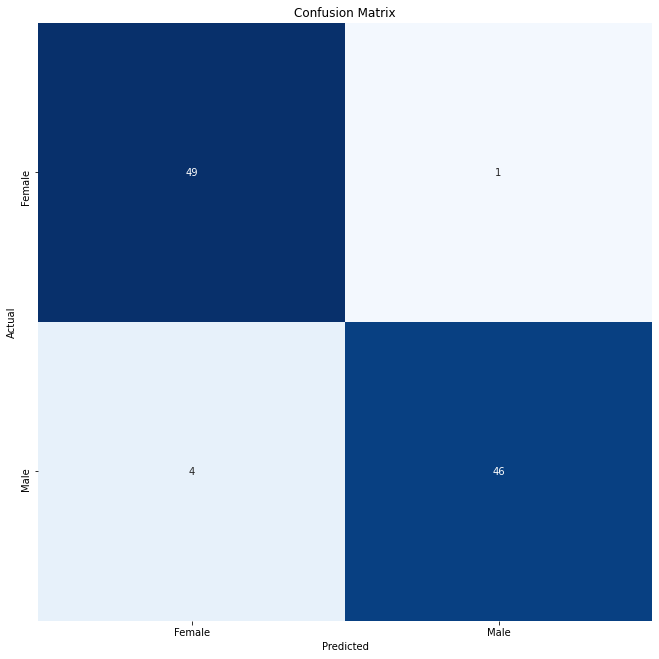

In [23]:
predictions = (model.predict(test_images_mal) >= 0.5).astype(int)
cm = confusion_matrix(test_images_mal.labels, predictions, labels = [0, 1])

plt.figure(figsize = (11, 11))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Female', 'Male'])
plt.yticks(ticks = [0.5, 1.5], labels = ['Female', 'Male'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [17]:
for i in range(100):
    if predictions[i] != test_images.labels[i]:
        print(i)

7
38
42
47
89


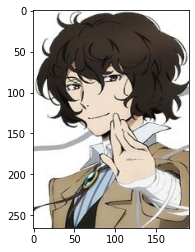

In [18]:
x = cv2.imread(test_df1.iloc[66][0])

plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB));